In [18]:
import pprint
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [19]:
#Data paths for census data.
censusLoadPath_17Short = './censusdata/output/summary_17B14005.csv'
censusLoadPath_18Short = './censusdata/output/summary_18B14005.csv'

censusLoadPath_17ByRace = './censusdata/output/summary_17B23002.csv'
censusLoadPath_18ByRace = './censusdata/output/summary_18B23002.csv'

In [20]:
#Data paths for graduation data
dallasGradLoadPath17 = './grad_rates/2017_Dallas_grad_data.csv'
houstonGradLoadPath17 = './grad_rates/2017_Houston_grad_data.csv'
phillyGradLoadPath17 = './grad_rates/PA_2017_grad_data.csv'

dallasGradLoadPath18 = './grad_rates/2018_Dallas_grad_data.csv'
houstonGradLoadPath18 = './grad_rates/2018_Houston_grad_data.csv'
phillyGradLoadPath18 = './grad_rates/PA_2018_grad_data.csv'

pd.options.display.max_columns = None

In [21]:
census17ShortFrame = pd.read_csv(censusLoadPath_17Short)

census17ShortFrame.head(20)

,Unnamed: 0,Name,Full_Code,TotEnrll,TotEnrllEmply,EmplyRateEnrll,TotEnrllUnEmply,UnEmplyRateEnrll,TotEnrllLbr,LbrRateEnrll,TotEnrllNonLbr,NonLbrRateEnrll
0,0,New York City Department of Education,9700000US3620580,328115,41729,0.706529,17333,0.293471,59062,0.180004,269053,0.819996
1,1,Chicago Public School District,9700000US1709930,112017,20354,0.700775,8691,0.299225,29045,0.259291,82972,0.740709
2,2,Los Angeles Unified School District,9700000US0622710,210144,34357,0.778947,9750,0.221053,44107,0.209889,166037,0.790111
3,3,Houston Independent School District,9700000US4823640,60480,9260,0.777628,2648,0.222372,11908,0.196892,48572,0.803108
4,4,Deer Valley Unified District,9700000US0407750,0,0,NaN,0,NaN,0,NaN,0,NaN
5,5,Deer Valley Unified District,9700000US0407750,0,0,NaN,0,NaN,0,NaN,0,NaN
6,6,Paradise Valley Unified District,9700000US0405930,0,0,NaN,0,NaN,0,NaN,0,NaN
7,7,Scottsdale Unified District,9700000US0407570,0,0,NaN,0,NaN,0,NaN,0,NaN
8,8,Dallas Independent School District,9700000US4816230,43465,12132,0.843379,2253,0.156621,14385,0.330956,29080,0.669044
9,9,San Antonio Independent School District,9700000US4838730,17097,3452,0.861277,556,0.138723,4008,0.234427,13089,0.765573


In [22]:
census17LongFrame = pd.read_csv(censusLoadPath_17ByRace)

census17LongFrame.tail()

,Unnamed: 0,Name,Full_Code,Unified_Secondary,BLKTot,INDTot,ASNTot,HIPTot,OTHTot,BIRTot,WHTTot,LATTot,BLKMil,INDMil,ASNMil,HIPMil,OTHMil,BIRMil,WHTMil,LATMil,BLKCiv,INDCiv,ASNCiv,HIPCiv,OTHCiv,BIRCiv,WHTCiv,LATCiv,BLKCivLbr,INDCivLbr,ASNCivLbr,HIPCivLbr,OTHCivLbr,BIRCivLbr,WHTCivLbr,LATCivLbr,BLKCivLbrRate,INDCivLbrRate,ASNCivLbrRate,HIPCivLbrRate,OTHCivLbrRate,BIRCivLbrRate,WHTCivLbrRate,LATCivLbrRate,BLKTotNonLbr,INDTotNonLbr,ASNTotNonLbr,HIPTotNonLbr,OTHTotNonLbr,BIRTotNonLbr,WHTTotNonLbr,LATTotNonLbr,BLKTotNonLbrRate,INDTotNonLbrRate,ASNTotNonLbrRate,HIPTotNonLbrRate,OTHTotNonLbrRate,BIRTotNonLbrRate,WHTTotNonLbrRate,LATTotNonLbrRate,BLKTotEmply,INDTotEmply,ASNTotEmply,HIPTotEmply,OTHTotEmply,BIRTotEmply,WHTTotEmply,LATTotEmply,BLKTotUnEmply,INDTotUnEmply,ASNTotUnEmply,HIPTotUnEmply,OTHTotUnEmply,BIRTotUnEmply,WHTTotUnEmply,LATTotUnEmply,BLKEmplyRate,INDEmplyRate,ASNEmplyRate,HIPEmplyRate,OTHEmplyRate,BIREmplyRate,WHTEmplyRate,LATEmplyRate,BLKUnEmplyRate,INDUnEmplyRate,ASNUnEmplyRate,HIPUnEmplyRate,OTHUnEmplyRate,BIRUnEmplyRate,WHTUnEmplyRate,LATUnEmplyRate
7,7,New York City Department of Education,9700000US3620580,U,102050,0,45929,0,72936,13702,89351,132516,0,0,0,0,46,0,64,339,102050,0,45929,0,72890,13702,89287,132177,22394,0,9223,0,19960,2883,16147,34083,0.219441,NaN,0.200810,NaN,0.273837,0.210407,0.180844,0.257859,79656,0,36706,0,52930,10819,73140,98094,0.780559,NaN,0.799190,NaN,0.726163,0.789593,0.819156,0.742141,14828,0,7315,0,13590,2056,13280,23529,7566,0,1908,0,6370,827,2867,10554,0.662142,NaN,0.793126,NaN,0.680862,0.713146,0.822444,0.690344,0.337858,NaN,0.206874,NaN,0.319138,0.286854,0.177556,0.309656
8,8,Philadelphia City School District,9700000US4218990,U,35319,0,6673,0,5461,0,22200,14127,0,0,0,0,0,0,25,60,35319,0,6673,0,5461,0,22175,14067,11502,0,960,0,2545,0,5866,4476,0.325660,NaN,0.143863,NaN,0.466032,NaN,0.264532,0.318192,23817,0,5713,0,2916,0,16309,9591,0.674340,NaN,0.856137,NaN,0.533968,NaN,0.735468,0.681808,6521,0,830,0,1357,0,4851,3234,4981,0,130,0,1188,0,1015,1242,0.566945,NaN,0.864583,NaN,0.533202,NaN,0.826969,0.722520,0.433055,NaN,0.135417,NaN,0.466798,NaN,0.173031,0.277480
9,9,Dallas Independent School District,9700000US4816230,U,12132,0,0,0,0,0,7604,33364,45,0,0,0,0,0,0,0,12087,0,0,0,0,0,7604,33364,3066,0,0,0,0,0,3687,14363,0.253661,NaN,NaN,NaN,NaN,NaN,0.484876,0.430494,9021,0,0,0,0,0,3917,19001,0.746339,NaN,NaN,NaN,NaN,NaN,0.515124,0.569506,2138,0,0,0,0,0,3035,12569,928,0,0,0,0,0,652,1794,0.697326,NaN,NaN,NaN,NaN,NaN,0.823162,0.875096,0.302674,NaN,NaN,NaN,NaN,NaN,0.176838,0.124904
10,10,Houston Independent School District,9700000US4823640,U,16655,0,3214,0,7312,0,9197,42321,0,0,0,0,0,0,0,0,16655,0,3214,0,7312,0,9197,42321,4966,0,294,0,2179,0,2176,10626,0.298169,NaN,0.091475,NaN,0.298003,NaN,0.236599,0.251081,11689,0,2920,0,5133,0,7021,31695,0.701831,NaN,0.908525,NaN,0.701997,NaN,0.763401,0.748919,3457,0,290,0,1223,0,2080,7160,1509,0,4,0,956,0,96,3466,0.696134,NaN,0.986395,NaN,0.561267,NaN,0.955882,0.673819,0.303866,NaN,0.013605,NaN,0.438733,NaN,0.044118,0.326181
11,11,San Antonio Independent School District,9700000US4838730,U,0,0,0,0,3893,0,1430,16950,0,0,0,0,0,0,0,0,0,0,0,0,3893,0,1430,16950,0,0,0,0,762,0,482,4765,NaN,NaN,NaN,NaN,0.195736,NaN,0.337063,0.281121,0,0,0,0,3131,0,948,12185,NaN,NaN,NaN,NaN,0.804264,NaN,0.662937,0.718879,0,0,0,0,602,0,392,4086,0,0,0,0,160,0,90,679,NaN,NaN,NaN,NaN,0.790026,NaN,0.813278,0.857503,NaN,NaN,NaN,NaN,0.209974,NaN,0.186722,0.142497


In [23]:
census18ShortFrame = pd.read_csv(censusLoadPath_18Short)

census18ShortFrame.head()

,Unnamed: 0,Name,Full_Code,TotEnrll,TotEnrllEmply,EmplyRateEnrll,TotEnrllUnEmply,UnEmplyRateEnrll,TotEnrllLbr,LbrRateEnrll,TotEnrllNonLbr,NonLbrRateEnrll
0,0,New York City Department of Education,9700000US3620580,316979,40718,0.719615,15865,0.280385,56583,0.178507,260396,0.821493
1,1,Chicago Public School District,9700000US1709930,106871,18527,0.734586,6694,0.265414,25221,0.235995,81650,0.764005
2,2,Los Angeles Unified School District,9700000US0622710,202729,32606,0.744463,11192,0.255537,43798,0.216042,158931,0.783958
3,3,Houston Independent School District,9700000US4823640,62366,8550,0.703125,3610,0.296875,12160,0.194978,50206,0.805022
4,4,Deer Valley Unified District,9700000US0407750,0,0,NaN,0,NaN,0,NaN,0,NaN


In [24]:
census18LongFrame = pd.read_csv(censusLoadPath_18ByRace)

census18LongFrame.tail()

,Unnamed: 0,Name,Full_Code,Unified_Secondary,BLKTot,INDTot,ASNTot,HIPTot,OTHTot,BIRTot,WHTTot,LATTot,BLKMil,INDMil,ASNMil,HIPMil,OTHMil,BIRMil,WHTMil,LATMil,BLKCiv,INDCiv,ASNCiv,HIPCiv,OTHCiv,BIRCiv,WHTCiv,LATCiv,BLKCivLbr,INDCivLbr,ASNCivLbr,HIPCivLbr,OTHCivLbr,BIRCivLbr,WHTCivLbr,LATCivLbr,BLKCivLbrRate,INDCivLbrRate,ASNCivLbrRate,HIPCivLbrRate,OTHCivLbrRate,BIRCivLbrRate,WHTCivLbrRate,LATCivLbrRate,BLKTotNonLbr,INDTotNonLbr,ASNTotNonLbr,HIPTotNonLbr,OTHTotNonLbr,BIRTotNonLbr,WHTTotNonLbr,LATTotNonLbr,BLKTotNonLbrRate,INDTotNonLbrRate,ASNTotNonLbrRate,HIPTotNonLbrRate,OTHTotNonLbrRate,BIRTotNonLbrRate,WHTTotNonLbrRate,LATTotNonLbrRate,BLKTotEmply,INDTotEmply,ASNTotEmply,HIPTotEmply,OTHTotEmply,BIRTotEmply,WHTTotEmply,LATTotEmply,BLKTotUnEmply,INDTotUnEmply,ASNTotUnEmply,HIPTotUnEmply,OTHTotUnEmply,BIRTotUnEmply,WHTTotUnEmply,LATTotUnEmply,BLKEmplyRate,INDEmplyRate,ASNEmplyRate,HIPEmplyRate,OTHEmplyRate,BIREmplyRate,WHTEmplyRate,LATEmplyRate,BLKUnEmplyRate,INDUnEmplyRate,ASNUnEmplyRate,HIPUnEmplyRate,OTHUnEmplyRate,BIRUnEmplyRate,WHTUnEmplyRate,LATUnEmplyRate
7,7,New York City Department of Education,9700000US3620580,U,100551,0,44469,0,67058,15976,86063,127381,0,0,29,0,40,0,83,40,100551,0,44440,0,67018,15976,85980,127341,20681,0,8299,0,14426,3643,17805,27552,0.205677,NaN,0.186746,NaN,0.215256,0.22803,0.207083,0.216364,79870,0,36141,0,52592,12333,68175,99789,0.794323,NaN,0.813254,NaN,0.784744,0.77197,0.792917,0.783636,13530,0,6847,0,9403,2438,14572,18615,7151,0,1452,0,5023,1205,3233,8937,0.654224,NaN,0.825039,NaN,0.651809,0.669229,0.818422,0.675632,0.345776,NaN,0.174961,NaN,0.348191,0.330771,0.181578,0.324368
8,8,Philadelphia City School District,9700000US4218990,U,32612,0,6748,0,7534,0,21388,15010,0,0,0,0,0,0,0,0,32612,0,6748,0,7534,0,21388,15010,10897,0,1658,0,2090,0,6754,4337,0.334141,NaN,0.245702,NaN,0.277409,NaN,0.315785,0.288941,21715,0,5090,0,5444,0,14634,10673,0.665859,NaN,0.754298,NaN,0.722591,NaN,0.684215,0.711059,7250,0,1520,0,1417,0,6295,2886,3647,0,138,0,673,0,459,1451,0.665321,NaN,0.916767,NaN,0.677990,NaN,0.932040,0.665437,0.334679,NaN,0.083233,NaN,0.322010,NaN,0.067960,0.334563
9,9,Dallas Independent School District,9700000US4816230,U,11881,0,0,0,3414,0,8195,34085,0,0,0,0,0,0,0,0,11881,0,0,0,3414,0,8195,34085,3207,0,0,0,1067,0,3244,11768,0.269927,NaN,NaN,NaN,0.312537,NaN,0.395851,0.345255,8674,0,0,0,2347,0,4951,22317,0.730073,NaN,NaN,NaN,0.687463,NaN,0.604149,0.654745,2596,0,0,0,978,0,2731,10205,611,0,0,0,89,0,513,1563,0.809479,NaN,NaN,NaN,0.916589,NaN,0.841862,0.867182,0.190521,NaN,NaN,NaN,0.083411,NaN,0.158138,0.132818
10,10,Houston Independent School District,9700000US4823640,U,20815,0,3421,0,11360,0,9147,41172,0,0,0,0,0,0,0,0,20815,0,3421,0,11360,0,9147,41172,4084,0,577,0,3889,0,2465,12634,0.196205,NaN,0.168664,NaN,0.342342,NaN,0.269487,0.306859,16731,0,2844,0,7471,0,6682,28538,0.803795,NaN,0.831336,NaN,0.657658,NaN,0.730513,0.693141,1953,0,459,0,3256,0,2102,9974,2131,0,118,0,633,0,363,2660,0.478208,NaN,0.795494,NaN,0.837233,NaN,0.852738,0.789457,0.521792,NaN,0.204506,NaN,0.162767,NaN,0.147262,0.210543
11,11,San Antonio Independent School District,9700000US4838730,U,0,0,0,0,0,0,1299,13974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1299,13974,0,0,0,0,0,0,307,4248,NaN,NaN,NaN,NaN,NaN,NaN,0.236336,0.303993,0,0,0,0,0,0,992,9726,NaN,NaN,NaN,NaN,NaN,NaN,0.763664,0.696007,0,0,0,0,0,0,307,2564,0,0,0,0,0,0,0,1684,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.603578,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.396422


In [25]:
dallas17Frame = pd.read_csv(dallasGradLoadPath17)

dallas17Frame.head()

,Campus number,Campus name,District number,District name,County,County Name,Region number,Region name,All students graduation rate,African American %,Asian %,Hispanic %,Other %,American Indian %,Pacific Islander %,White %
0,57905001,Bryan Adams H S,57905,Dallas ISD,57,Dallas County,10,Richardson,97.3,88.6,83.3,98.8,66.7,100.0,.,100.0
1,57905002,W H Adamson H S,57905,Dallas ISD,57,Dallas County,10,Richardson,87.9,85.7,100.0,87.8,.,100.0,.,100.0
2,57905003,A Maceo Smith New Tech H S,57905,Dallas ISD,57,Dallas County,10,Richardson,100.0,100.0,100.0,100.0,100.0,.,.,100.0
3,57905005,Moises E Molina H S,57905,Dallas ISD,57,Dallas County,10,Richardson,92.5,70.0,100.0,92.9,100.0,100.0,.,100.0
4,57905006,Hillcrest H S,57905,Dallas ISD,57,Dallas County,10,Richardson,87.5,87.9,80.0,87.5,80.0,100.0,.,88.9


In [26]:
houston17Frame = pd.read_csv(houstonGradLoadPath17)

houston17Frame.head()

,Campus number,Campus name,District number,District name,County,County Name,Region number,Region name,All students graduation rate,African American %,Asian %,Hispanic %,Other %,American Indian %,Pacific Islander %,White %
0,101912001,Austin H S,101912,Houston ISD,101,Harris County,4,Houston,87.0,85.0,100.0,86.9,100.0,100.0,.,100.0
1,101912002,Bellaire H S,101912,Houston ISD,101,Harris County,4,Houston,90.8,94.3,94.6,85.7,100.0,100.0,100.0,94.6
2,101912003,Northside H S,101912,Houston ISD,101,Harris County,4,Houston,79.9,78.4,100.0,80.6,.,.,.,50.0
3,101912004,Furr H S,101912,Houston ISD,101,Harris County,4,Houston,91.2,93.8,100.0,90.9,.,.,.,80.0
4,101912006,Jones Futures Academy,101912,Houston ISD,101,Harris County,4,Houston,83.3,75.0,.,87.5,.,.,.,.


In [27]:
philly17Frame = pd.read_csv(phillyGradLoadPath17)

philly17Frame.head()

,LEA Type,AUN,LEA,School Number,School,School Type,Grads,Cohort,Cohort Grad Rate,American Indian %,Pacific Islander %,Asian %,African American %,Hispanic %,White %,Other %
0,SD,126515001.0,Philadelphia City SD,7904.0,Academy at Palumbo,REGSCH,198,205,96.59%,NaN,NaN,96.88%,97.70%,100.00%,92.11%,100.00%
1,SD,126515001.0,Philadelphia City SD,8039.0,Arts Academy at Benjamin Rush,REGSCH,137,142,96.48%,100.00%,NaN,75.00%,94.29%,100.00%,100.00%,100.00%
2,SD,126515001.0,Philadelphia City SD,3847.0,Bartram John - Main,REGSCH,129,227,56.83%,NaN,NaN,66.67%,56.73%,50.00%,50.00%,66.67%
3,SD,126515001.0,Philadelphia City SD,7070.0,Bodine William W HS,REGSCH,103,106,97.17%,NaN,NaN,100.00%,100.00%,95.45%,93.75%,83.33%
4,SD,126515001.0,Philadelphia City SD,7023.0,Carver HS,REGSCH,176,192,91.67%,NaN,NaN,90.48%,91.33%,88.89%,100.00%,100.00%


In [50]:
dallas18Frame = pd.read_csv(dallasGradLoadPath18)

dallas18Frame.head()

,Campus number,Campus name,District number,District name,County,County Name,Region number,Region name,All students graduation rate,African American %,Asian %,Hispanic %,Other %,American Indian %,Pacific Islander %,White %
0,57905001,Bryan Adams H S,57905,Dallas ISD,57,Dallas County,10,Richardson,93.5,96.0,87.5,95.3,50.0,100.0,.,66.7
1,57905002,W H Adamson H S,57905,Dallas ISD,57,Dallas County,10,Richardson,88.3,100.0,.,87.9,.,100.0,.,100.0
2,57905003,A Maceo Smith New Tech H S,57905,Dallas ISD,57,Dallas County,10,Richardson,99.0,100.0,.,98.6,.,.,.,100.0
3,57905005,Moises E Molina H S,57905,Dallas ISD,57,Dallas County,10,Richardson,92.0,87.5,100.0,92.2,.,0.0,.,100.0
4,57905006,Hillcrest H S,57905,Dallas ISD,57,Dallas County,10,Richardson,92.1,91.3,83.3,93.0,.,.,.,89.3


In [29]:
houston18Frame = pd.read_csv(houstonGradLoadPath18)

houston18Frame.head()

,Campus number,Campus name,District number,District name,County,County Name,Region number,Region name,All students graduation rate,African American %,Asian %,Hispanic %,Other %,American Indian %,Pacific Islander %,White %
0,101912001,Austin H S,101912,Houston ISD,101,Harris County,4,Houston,86.1,82.8,.,86.7,100.0,100.0,.,62.5
1,101912002,Bellaire H S,101912,Houston ISD,101,Harris County,4,Houston,92.2,92.9,96.7,87.6,100.0,100.0,.,97.7
2,101912003,Northside H S,101912,Houston ISD,101,Harris County,4,Houston,81.2,79.1,.,81.6,50.0,.,.,100.0
3,101912004,Furr H S,101912,Houston ISD,101,Harris County,4,Houston,72.5,75.5,100.0,70.7,100.0,100.0,.,83.3
4,101912006,Jones Futures Academy,101912,Houston ISD,101,Harris County,4,Houston,92.6,89.5,100.0,93.2,.,.,.,.


In [30]:
philly18Frame = pd.read_csv(phillyGradLoadPath18)

philly18Frame.head()

,LEA Type,AUN,LEA,School Number,School,School Type,Grads,Cohort,Cohort Grad Rate,American Indian %,Pacific Islander %,Asian %,African American %,Hispanic %,White %,Other %
0,SD,126515001.0,Philadelphia City SD,7904.0,Academy at Palumbo,REGSCH,212,229,92.58%,100.00%,NaN,92.65%,95.10%,82.61%,92.86%,85.71%
1,SD,126515001.0,Philadelphia City SD,8039.0,Arts Academy at Benjamin Rush,REGSCH,145,149,97.32%,NaN,NaN,100.00%,90.63%,100.00%,100.00%,85.71%
2,SD,126515001.0,Philadelphia City SD,3847.0,Bartram John - Main,REGSCH,126,204,61.76%,NaN,NaN,100.00%,62.92%,36.36%,66.67%,33.33%
3,SD,126515001.0,Philadelphia City SD,7070.0,Bodine William W HS,REGSCH,104,114,91.23%,NaN,NaN,100.00%,89.09%,93.10%,100.00%,66.67%
4,SD,126515001.0,Philadelphia City SD,8332.0,Building 21,REGSCH,65,82,79.27%,NaN,NaN,NaN,84.62%,75.00%,50.00%,50.00%


In [31]:
short17Condensed = census17ShortFrame[["Name", "TotEnrll", "TotEnrllEmply", "EmplyRateEnrll", "TotEnrllUnEmply", "UnEmplyRateEnrll"]]
short18Condensed = census18ShortFrame[["Name", "TotEnrll", "TotEnrllEmply", "EmplyRateEnrll", "TotEnrllUnEmply", "UnEmplyRateEnrll"]]
dallas17GeneralGradRate = dallas17Frame[["District name", "Campus name", "All students graduation rate"]]
dallas18GeneralGradRate = dallas18Frame[["District name", "Campus name", "All students graduation rate"]]


C:\Users\paulc\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


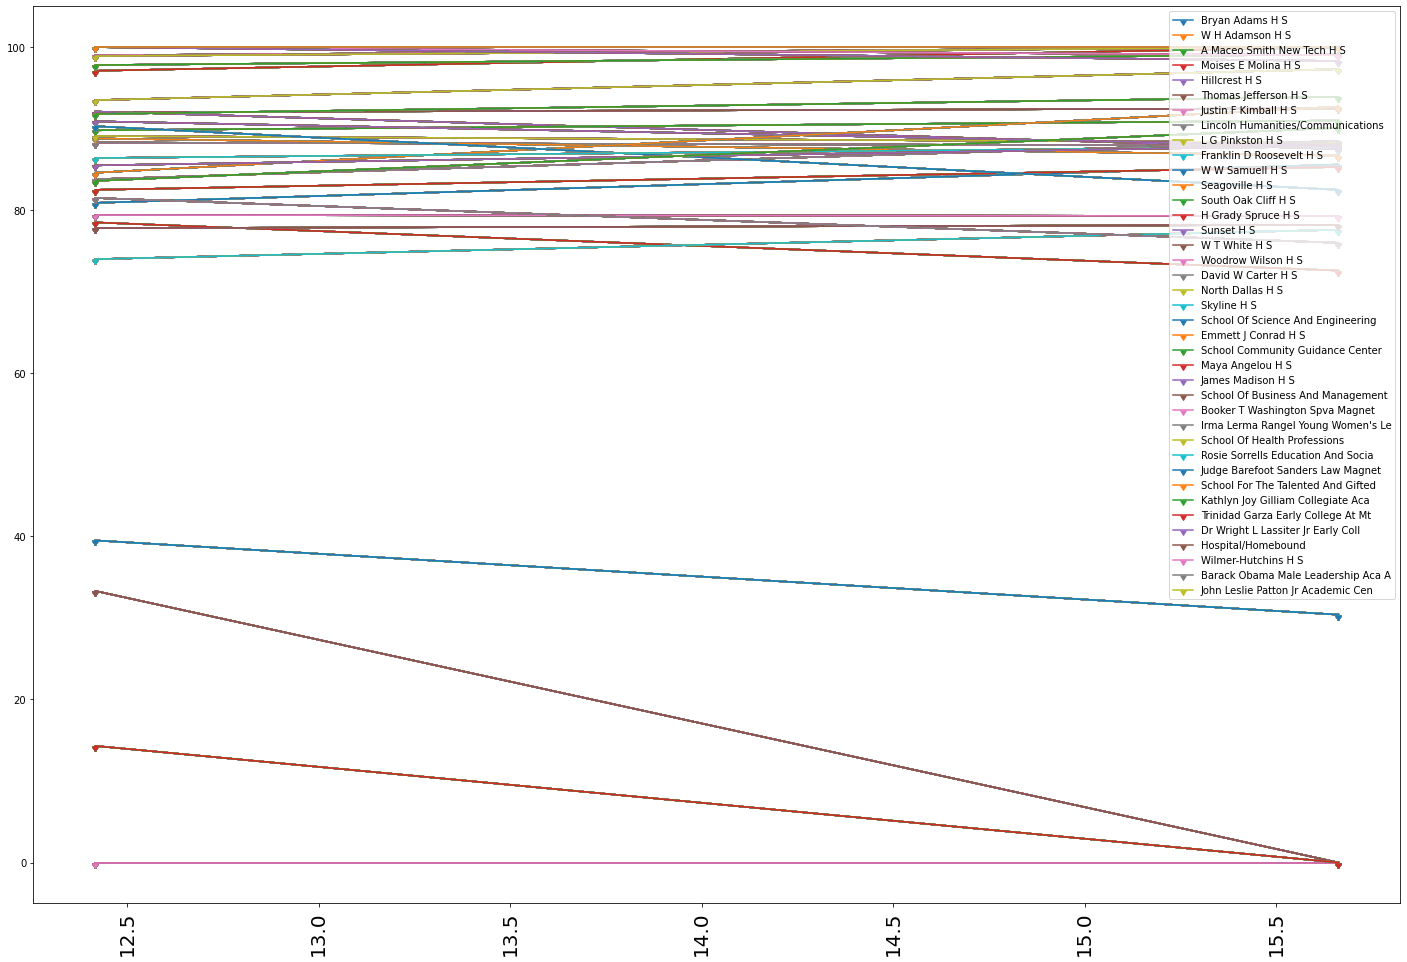

In [135]:
gradData17 = dallas17GeneralGradRate['All students graduation rate']
gradData18 = dallas18GeneralGradRate['All students graduation rate']

unemployData = [short17Condensed.loc[short17Condensed['Name'] == 'Dallas Independent School District', 'UnEmplyRateEnrll'], 
                short18Condensed.loc[short18Condensed['Name'] == 'Dallas Independent School District', 'UnEmplyRateEnrll']]

fig = plt.gcf()
fig.set_size_inches(24.5, 16.5)

#unemployData.columns = ['Unemployment Rate']
#print(gradData17)

dallas17GeneralGradRate['Unemployment Rate'] = short17Condensed[short17Condensed.Name == 'Dallas Independent School District'].UnEmplyRateEnrll.item() * 100
dallas18GeneralGradRate['Unemployment Rate'] = short18Condensed[short18Condensed.Name == 'Dallas Independent School District'].UnEmplyRateEnrll.item() * 100
dallasLabels = dallas17GeneralGradRate['Campus name']
comebinedGradRate = [dallas17GeneralGradRate['All students graduation rate'], dallas18GeneralGradRate['All students graduation rate']]
combinedUnemployRate = [dallas17GeneralGradRate['Unemployment Rate'], dallas18GeneralGradRate['Unemployment Rate']]

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=20)

for x in range(len(comebinedGradRate)):
    for y in range(len(comebinedGradRate[x])):
        plt.plot(combinedUnemployRate, [comebinedGradRate[x][y], comebinedGradRate[x + 1][y]], marker=11)
        
    break
    
plt.legend(dallasLabels, loc='upper right')